# THERE IS A BUG WITH SORTING (6/21/24)
Temporary fix has been implemented, needs to be adjusted
# VisMCAO: DM2 Study
The goal of this jupyter notebook is to produce plots of point-spread function (PSF) metrics and wave-front error (WFE) for the acutator count trade study. Refer to Overleaf for most up to date figures. The following plots are currently in this jupyter notebook. Future notebooks will contain actual PSF images as well (work in progress). 
* 10x WFE vs. Time (for each psf location)
* Radius vs. Strehl
* Radius vs. FWHM
* Radius vs. EE80
* Radius vs. WFE
* Height vs. PSF Metrics (1000 nm) and WFE (center)

## Setup

In [1]:
import pylab as plt
import numpy as np
from astropy.io import fits
import os, fnmatch
import importlib
import readbin

# Packages specific to MU Lab (all on github)
from paarti.utils import maos_utils
from paarti import psfs, psf_plots
from paarti.psf_metrics import metrics
from bpeck.mcao import act_study

## Parameters 

In [2]:
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200] # nanometer

height = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

bandpass = 3 # 1000 nanometers
seed = 1

%matplotlib inline

## Get data from directories 
Currently, this notebook can only accepts DM height values of 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000 that have the following names:
* 1000m, 2000m, 3000m, 4000m, 5000m, 6000m, 7000m, 8000m, 9000m, 10000m

Each of these should be full MAOS directories (folders). As of right now, the DM height study is considering no other actuator count values. Additionally, arrange the repository as:

> act_study1 (or any other name, doesn't matter for this notebook) \
> |── 1000m \
> |── 2000m \
> |── 3000m \
> |── 4000m \
> |── 5000m \
> |── 6000m \
> |── 7000m \
> |── 8000m \
> |── 9000m \
> |── 10000m \
> |── A_dm2_study.ipynb (name of this notebook) 

## Output Folder for Subplots

In [3]:
# Name of output folder for all individual subplots
output_folder = 'dm2_study_plots/'

# Creates an output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

### 1000 meters

In [5]:
os.chdir("1000m") # child directory

In [7]:
#PSF metrics
unsorted_mets_1000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_1000, unsorted_y_1000, unsorted_w_1000, unsorted_strehl_1000, unsorted_fwhm_g_1000, unsorted_fwhm_e_1000, unsorted_r_ee50_1000, unsorted_r_ee80_1000 = unsorted_mets_1000

x_1000 = np.concatenate((unsorted_x_1000[:1], unsorted_x_1000[8:9], unsorted_x_1000[1:8], unsorted_x_1000[9:]), axis=0)
w_1000 = np.concatenate((unsorted_w_1000[:1], unsorted_w_1000[8:9], unsorted_w_1000[1:8], unsorted_w_1000[9:]), axis=0)
strehl_1000 = np.concatenate((unsorted_strehl_1000[:1], unsorted_strehl_1000[8:9], unsorted_strehl_1000[1:8], unsorted_strehl_1000[9:]), axis=0)
fwhm_g_1000 = np.concatenate((unsorted_fwhm_g_1000[:1], unsorted_fwhm_g_1000[8:9], unsorted_fwhm_g_1000[1:8], unsorted_fwhm_g_1000[9:]), axis=0)
fwhm_e_1000 = np.concatenate((unsorted_fwhm_e_1000[:1], unsorted_fwhm_e_1000[8:9], unsorted_fwhm_e_1000[1:8], unsorted_fwhm_e_1000[9:]), axis=0)
r_ee50_1000 = np.concatenate((unsorted_r_ee50_1000[:1], unsorted_r_ee50_1000[8:9], unsorted_r_ee50_1000[1:8], unsorted_r_ee50_1000[9:]), axis=0)
r_ee80_1000 = np.concatenate((unsorted_r_ee80_1000[:1], unsorted_r_ee80_1000[8:9], unsorted_r_ee80_1000[1:8], unsorted_r_ee80_1000[9:]), axis=0)

In [8]:
#WFE
wfe_1000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_1000, clos_mean_nm_1000, open_xx_mean_nm_1000, clos_xx_mean_nm_1000 = wfe_1000

In [9]:
os.chdir("..") # Back to act_study parent directory

### 2000 meters

In [10]:
os.chdir("2000m") # child directory

In [11]:
#PSF metrics
unsorted_mets_2000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_2000, unsorted_y_2000, unsorted_w_2000, unsorted_strehl_2000, unsorted_fwhm_g_2000, unsorted_fwhm_e_2000, unsorted_r_ee50_2000, unsorted_r_ee80_2000 = unsorted_mets_2000

x_2000 = np.concatenate((unsorted_x_2000[:1], unsorted_x_2000[8:9], unsorted_x_2000[1:8], unsorted_x_2000[9:]), axis=0)
w_2000 = np.concatenate((unsorted_w_2000[:1], unsorted_w_2000[8:9], unsorted_w_2000[1:8], unsorted_w_2000[9:]), axis=0)
strehl_2000 = np.concatenate((unsorted_strehl_2000[:1], unsorted_strehl_2000[8:9], unsorted_strehl_2000[1:8], unsorted_strehl_2000[9:]), axis=0)
fwhm_g_2000 = np.concatenate((unsorted_fwhm_g_2000[:1], unsorted_fwhm_g_2000[8:9], unsorted_fwhm_g_2000[1:8], unsorted_fwhm_g_2000[9:]), axis=0)
fwhm_e_2000 = np.concatenate((unsorted_fwhm_e_2000[:1], unsorted_fwhm_e_2000[8:9], unsorted_fwhm_e_2000[1:8], unsorted_fwhm_e_2000[9:]), axis=0)
r_ee50_2000 = np.concatenate((unsorted_r_ee50_2000[:1], unsorted_r_ee50_2000[8:9], unsorted_r_ee50_2000[1:8], unsorted_r_ee50_2000[9:]), axis=0)
r_ee80_2000 = np.concatenate((unsorted_r_ee80_2000[:1], unsorted_r_ee80_2000[8:9], unsorted_r_ee80_2000[1:8], unsorted_r_ee80_2000[9:]), axis=0)

In [12]:
#WFE
wfe_2000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_2000, clos_mean_nm_2000, open_xx_mean_nm_2000, clos_xx_mean_nm_2000 = wfe_2000

In [13]:
os.chdir("..") # Back to act_study parent directory

### 3000 meters

In [14]:
os.chdir("3000m")

In [15]:
#PSF metrics
unsorted_mets_3000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_3000, unsorted_y_3000, unsorted_w_3000, unsorted_strehl_3000, unsorted_fwhm_g_3000, unsorted_fwhm_e_3000, unsorted_r_ee50_3000, unsorted_r_ee80_3000 = unsorted_mets_3000

x_3000 = np.concatenate((unsorted_x_3000[:1], unsorted_x_3000[8:9], unsorted_x_3000[1:8], unsorted_x_3000[9:]), axis=0)
w_3000 = np.concatenate((unsorted_w_3000[:1], unsorted_w_3000[8:9], unsorted_w_3000[1:8], unsorted_w_3000[9:]), axis=0)
strehl_3000 = np.concatenate((unsorted_strehl_3000[:1], unsorted_strehl_3000[8:9], unsorted_strehl_3000[1:8], unsorted_strehl_3000[9:]), axis=0)
fwhm_g_3000 = np.concatenate((unsorted_fwhm_g_3000[:1], unsorted_fwhm_g_3000[8:9], unsorted_fwhm_g_3000[1:8], unsorted_fwhm_g_3000[9:]), axis=0)
fwhm_e_3000 = np.concatenate((unsorted_fwhm_e_3000[:1], unsorted_fwhm_e_3000[8:9], unsorted_fwhm_e_3000[1:8], unsorted_fwhm_e_3000[9:]), axis=0)
r_ee50_3000 = np.concatenate((unsorted_r_ee50_3000[:1], unsorted_r_ee50_3000[8:9], unsorted_r_ee50_3000[1:8], unsorted_r_ee50_3000[9:]), axis=0)
r_ee80_3000 = np.concatenate((unsorted_r_ee80_3000[:1], unsorted_r_ee80_3000[8:9], unsorted_r_ee80_3000[1:8], unsorted_r_ee80_3000[9:]), axis=0)

In [16]:
#WFE
wfe_3000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_3000, clos_mean_nm_3000, open_xx_mean_nm_3000, clos_xx_mean_nm_3000 = wfe_3000

In [17]:
os.chdir("..")

### 4000 meters

In [18]:
os.chdir("4000m")

In [19]:
#PSF metrics
unsorted_mets_4000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_4000, unsorted_y_4000, unsorted_w_4000, unsorted_strehl_4000, unsorted_fwhm_g_4000, unsorted_fwhm_e_4000, unsorted_r_ee50_4000, unsorted_r_ee80_4000 = unsorted_mets_4000

x_4000 = np.concatenate((unsorted_x_4000[:1], unsorted_x_4000[8:9], unsorted_x_4000[1:8], unsorted_x_4000[9:]), axis=0)
w_4000 = np.concatenate((unsorted_w_4000[:1], unsorted_w_4000[8:9], unsorted_w_4000[1:8], unsorted_w_4000[9:]), axis=0)
strehl_4000 = np.concatenate((unsorted_strehl_4000[:1], unsorted_strehl_4000[8:9], unsorted_strehl_4000[1:8], unsorted_strehl_4000[9:]), axis=0)
fwhm_g_4000 = np.concatenate((unsorted_fwhm_g_4000[:1], unsorted_fwhm_g_4000[8:9], unsorted_fwhm_g_4000[1:8], unsorted_fwhm_g_4000[9:]), axis=0)
fwhm_e_4000 = np.concatenate((unsorted_fwhm_e_4000[:1], unsorted_fwhm_e_4000[8:9], unsorted_fwhm_e_4000[1:8], unsorted_fwhm_e_4000[9:]), axis=0)
r_ee50_4000 = np.concatenate((unsorted_r_ee50_4000[:1], unsorted_r_ee50_4000[8:9], unsorted_r_ee50_4000[1:8], unsorted_r_ee50_4000[9:]), axis=0)
r_ee80_4000 = np.concatenate((unsorted_r_ee80_4000[:1], unsorted_r_ee80_4000[8:9], unsorted_r_ee80_4000[1:8], unsorted_r_ee80_4000[9:]), axis=0)

In [20]:
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors = ["r", "g", "b"] # Colors match those presented in MAOS

results_xx_file = f'extra/Resp_{seed}.bin'
results_xx = readbin.readbin(results_xx_file)

open_mean_nm, clos_mean_nm, open_xx_mean_nm, clos_xx_mean_nm = act_study.get_wfe_metrics(seed=1)

n_psf = clos_xx_mean_nm.shape[0]

#### 10x WFE vs. Time (Individual Plots)

FileNotFoundError: [Errno 2] No such file or directory: '../actuator_study_plots/actuator_4000_wfe_subplot_0.png'

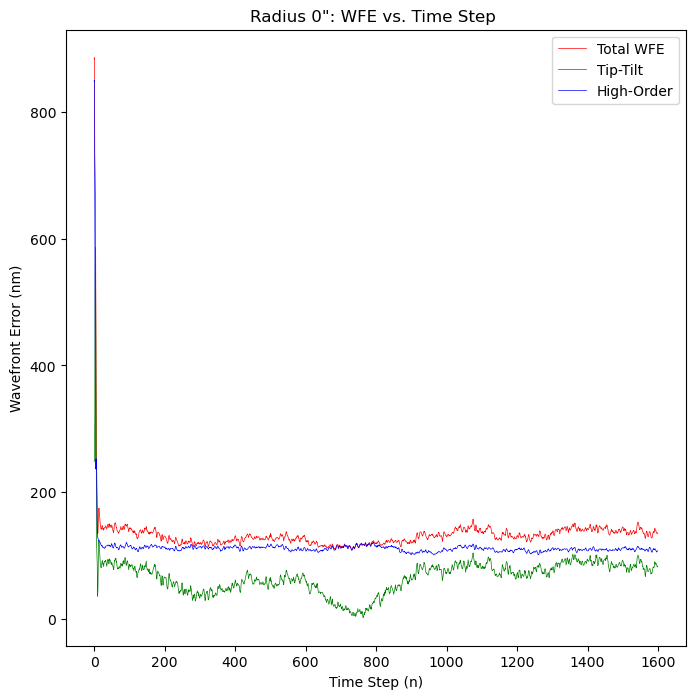

In [21]:
# 10x WFE vs. Time (for each psf location) for 4000 actuators

# Loop through each PSF location
for i in range(n_psf):
    clos_psf_results = results_xx[3][i]
    plt.figure(figsize=(8,8))
    
    # Plot WFE vs. Time Step for each type of WFE (total, tip-tilt, high-order)
    for j in range(clos_psf_results.shape[1]):
        plt.plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        
    plt.xlabel('Time Step (n)')
    plt.ylabel('Wavefront Error (nm)')
    plt.legend(loc='upper right')
    plt.title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

    # Save the subplot in new output folder
    plt.savefig(f'../actuator_study_plots/actuator_4000_wfe_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close() # Prevents plotting figures on top of each other

#### 10x WFE vs. Time (1 Subplot)

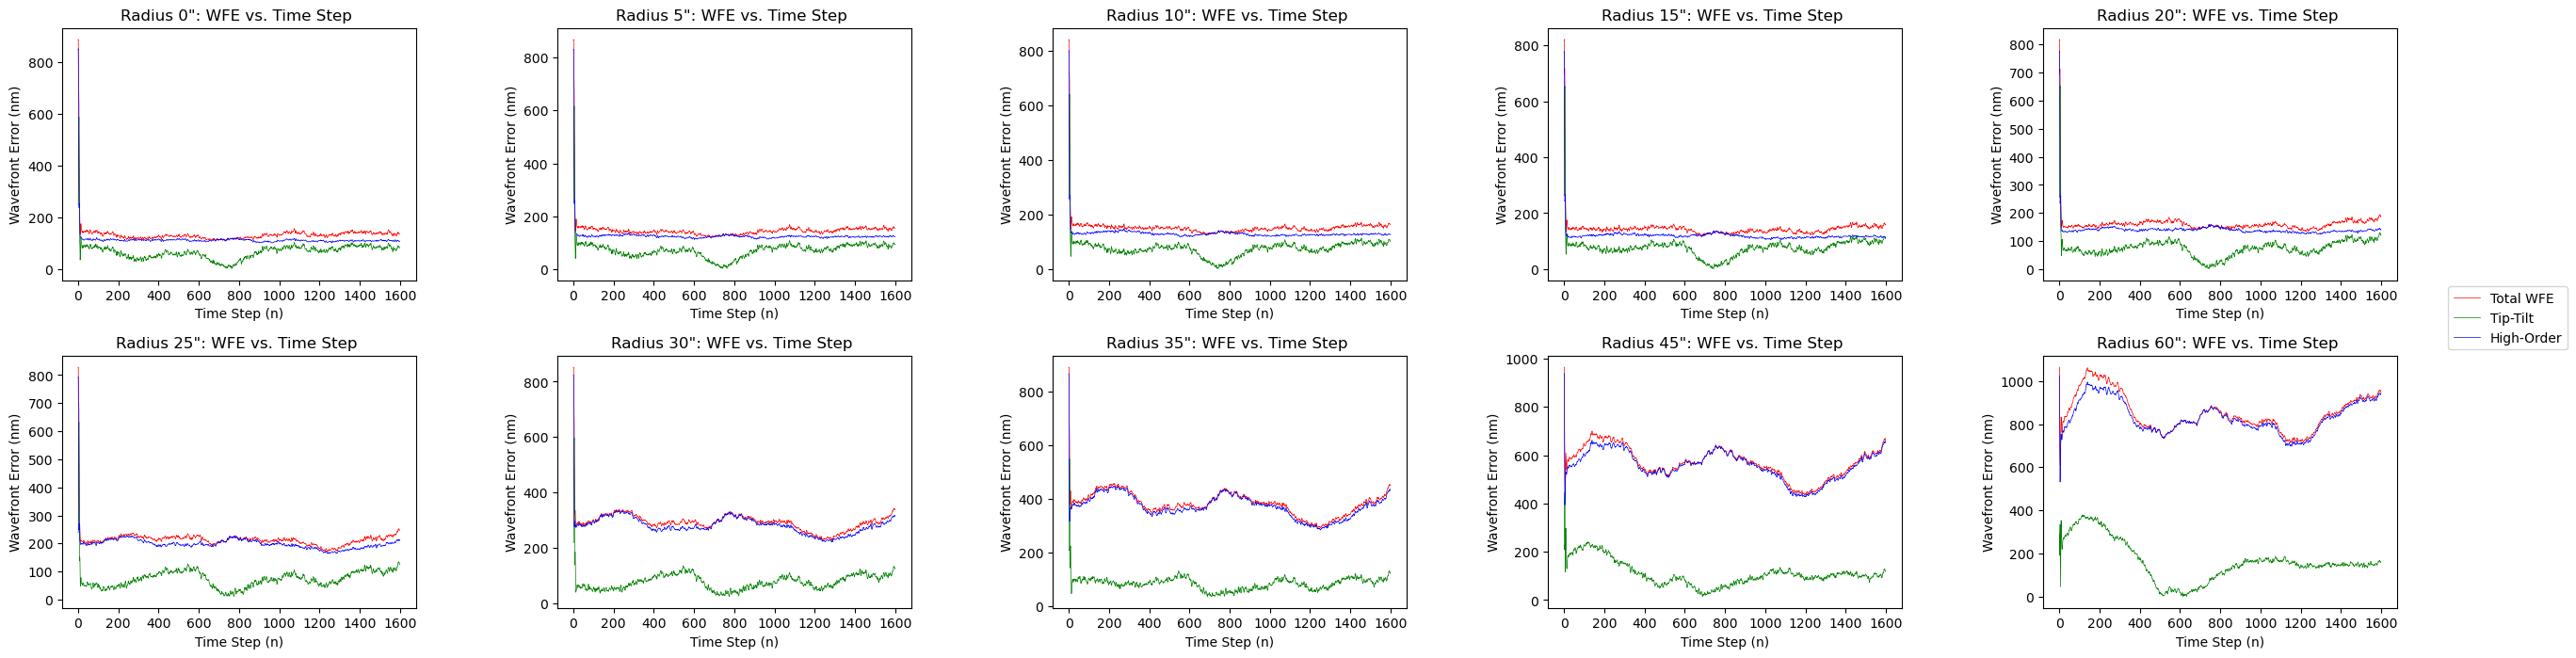

In [23]:
# Create subplots for all PSF locations
fig, ax = plt.subplots(2, n_psf // 2, figsize= (32,8), gridspec_kw={'hspace': 0.3, 'wspace': 0.4})

for i in range(n_psf):
    row_index = i // (n_psf // 2) # Creates two rows
    col_index = (i % (n_psf // 2)) # Creates five columns 
    clos_psf_results = results_xx[3][i]

    # Plot WFE vs. Time Step for each type of WFE (total, tip-tilt, high-order)
    for j in range(clos_psf_results.shape[1]):
        ax[row_index,col_index].plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        ax[row_index,col_index].set_xlabel('Time Step (n)')
        ax[row_index,col_index].set_ylabel('Wavefront Error (nm)')
        ax[row_index,col_index].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

# Add legend to only the last subplot
ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))

# Save the figure
#plt.savefig('../actuator_study_plots/actuator_4000_wfe_total.png', bbox_inches='tight', transparent=True)

In [24]:
#WFE
wfe_4000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_4000, clos_mean_nm_4000, open_xx_mean_nm_4000, clos_xx_mean_nm_4000 = wfe_4000

In [25]:
os.chdir("..")

### 5000 meters

In [26]:
os.chdir("5000m")

In [27]:
#PSF metrics
unsorted_mets_5000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_5000, unsorted_y_5000, unsorted_w_5000, unsorted_strehl_5000, unsorted_fwhm_g_5000, unsorted_fwhm_e_5000, unsorted_r_ee50_5000, unsorted_r_ee80_5000 = unsorted_mets_5000

x_5000 = np.concatenate((unsorted_x_5000[:1], unsorted_x_5000[8:9], unsorted_x_5000[1:8], unsorted_x_5000[9:]), axis=0)
w_5000 = np.concatenate((unsorted_w_5000[:1], unsorted_w_5000[8:9], unsorted_w_5000[1:8], unsorted_w_5000[9:]), axis=0)
strehl_5000 = np.concatenate((unsorted_strehl_5000[:1], unsorted_strehl_5000[8:9], unsorted_strehl_5000[1:8], unsorted_strehl_5000[9:]), axis=0)
fwhm_g_5000 = np.concatenate((unsorted_fwhm_g_5000[:1], unsorted_fwhm_g_5000[8:9], unsorted_fwhm_g_5000[1:8], unsorted_fwhm_g_5000[9:]), axis=0)
fwhm_e_5000 = np.concatenate((unsorted_fwhm_e_5000[:1], unsorted_fwhm_e_5000[8:9], unsorted_fwhm_e_5000[1:8], unsorted_fwhm_e_5000[9:]), axis=0)
r_ee50_5000 = np.concatenate((unsorted_r_ee50_5000[:1], unsorted_r_ee50_5000[8:9], unsorted_r_ee50_5000[1:8], unsorted_r_ee50_5000[9:]), axis=0)
r_ee80_5000 = np.concatenate((unsorted_r_ee80_5000[:1], unsorted_r_ee80_5000[8:9], unsorted_r_ee80_5000[1:8], unsorted_r_ee80_5000[9:]), axis=0)

In [28]:
#WFE
wfe_5000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_5000, clos_mean_nm_5000, open_xx_mean_nm_5000, clos_xx_mean_nm_5000 = wfe_5000

In [29]:
os.chdir("..")

### 6000 meters

In [30]:
os.chdir("6000m")

In [31]:
#PSF metrics
unsorted_mets_6000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_6000, unsorted_y_6000, unsorted_w_6000, unsorted_strehl_6000, unsorted_fwhm_g_6000, unsorted_fwhm_e_6000, unsorted_r_ee50_6000, unsorted_r_ee80_6000 = unsorted_mets_6000

x_6000 = np.concatenate((unsorted_x_6000[:1], unsorted_x_6000[8:9], unsorted_x_6000[1:8], unsorted_x_6000[9:]), axis=0)
w_6000 = np.concatenate((unsorted_w_6000[:1], unsorted_w_6000[8:9], unsorted_w_6000[1:8], unsorted_w_6000[9:]), axis=0)
strehl_6000 = np.concatenate((unsorted_strehl_6000[:1], unsorted_strehl_6000[8:9], unsorted_strehl_6000[1:8], unsorted_strehl_6000[9:]), axis=0)
fwhm_g_6000 = np.concatenate((unsorted_fwhm_g_6000[:1], unsorted_fwhm_g_6000[8:9], unsorted_fwhm_g_6000[1:8], unsorted_fwhm_g_6000[9:]), axis=0)
fwhm_e_6000 = np.concatenate((unsorted_fwhm_e_6000[:1], unsorted_fwhm_e_6000[8:9], unsorted_fwhm_e_6000[1:8], unsorted_fwhm_e_6000[9:]), axis=0)
r_ee50_6000 = np.concatenate((unsorted_r_ee50_6000[:1], unsorted_r_ee50_6000[8:9], unsorted_r_ee50_6000[1:8], unsorted_r_ee50_6000[9:]), axis=0)
r_ee80_6000 = np.concatenate((unsorted_r_ee80_6000[:1], unsorted_r_ee80_6000[8:9], unsorted_r_ee80_6000[1:8], unsorted_r_ee80_6000[9:]), axis=0)

In [32]:
#WFE
wfe_6000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_6000, clos_mean_nm_6000, open_xx_mean_nm_6000, clos_xx_mean_nm_6000 = wfe_6000

In [33]:
os.chdir("..")

### 7000 meters

In [77]:
os.chdir("7000m")

In [36]:
#PSF metrics
unsorted_mets_7000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_7000, unsorted_y_7000, unsorted_w_7000, unsorted_strehl_7000, unsorted_fwhm_g_7000, unsorted_fwhm_e_7000, unsorted_r_ee50_7000, unsorted_r_ee80_7000 = unsorted_mets_7000

x_7000 = np.concatenate((unsorted_x_7000[:1], unsorted_x_7000[8:9], unsorted_x_7000[1:8], unsorted_x_7000[9:]), axis=0)
w_7000 = np.concatenate((unsorted_w_7000[:1], unsorted_w_7000[8:9], unsorted_w_7000[1:8], unsorted_w_7000[9:]), axis=0)
strehl_7000 = np.concatenate((unsorted_strehl_7000[:1], unsorted_strehl_7000[8:9], unsorted_strehl_7000[1:8], unsorted_strehl_7000[9:]), axis=0)
fwhm_g_7000 = np.concatenate((unsorted_fwhm_g_7000[:1], unsorted_fwhm_g_7000[8:9], unsorted_fwhm_g_7000[1:8], unsorted_fwhm_g_7000[9:]), axis=0)
fwhm_e_7000 = np.concatenate((unsorted_fwhm_e_7000[:1], unsorted_fwhm_e_7000[8:9], unsorted_fwhm_e_7000[1:8], unsorted_fwhm_e_7000[9:]), axis=0)
r_ee50_7000 = np.concatenate((unsorted_r_ee50_7000[:1], unsorted_r_ee50_7000[8:9], unsorted_r_ee50_7000[1:8], unsorted_r_ee50_7000[9:]), axis=0)
r_ee80_7000 = np.concatenate((unsorted_r_ee80_7000[:1], unsorted_r_ee80_7000[8:9], unsorted_r_ee80_7000[1:8], unsorted_r_ee80_7000[9:]), axis=0)

In [78]:
#WFE
wfe_7000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_7000, clos_mean_nm_7000, open_xx_mean_nm_7000, clos_xx_mean_nm_7000 = wfe_7000

In [79]:
os.chdir("..")

### 8000 meters

In [80]:
os.chdir("8000m")

In [40]:
#PSF metrics
unsorted_mets_8000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_8000, unsorted_y_8000, unsorted_w_8000, unsorted_strehl_8000, unsorted_fwhm_g_8000, unsorted_fwhm_e_8000, unsorted_r_ee50_8000, unsorted_r_ee80_8000 = unsorted_mets_8000

x_8000 = np.concatenate((unsorted_x_8000[:1], unsorted_x_8000[8:9], unsorted_x_8000[1:8], unsorted_x_8000[9:]), axis=0)
w_8000 = np.concatenate((unsorted_w_8000[:1], unsorted_w_8000[8:9], unsorted_w_8000[1:8], unsorted_w_8000[9:]), axis=0)
strehl_8000 = np.concatenate((unsorted_strehl_8000[:1], unsorted_strehl_8000[8:9], unsorted_strehl_8000[1:8], unsorted_strehl_8000[9:]), axis=0)
fwhm_g_8000 = np.concatenate((unsorted_fwhm_g_8000[:1], unsorted_fwhm_g_8000[8:9], unsorted_fwhm_g_8000[1:8], unsorted_fwhm_g_8000[9:]), axis=0)
fwhm_e_8000 = np.concatenate((unsorted_fwhm_e_8000[:1], unsorted_fwhm_e_8000[8:9], unsorted_fwhm_e_8000[1:8], unsorted_fwhm_e_8000[9:]), axis=0)
r_ee50_8000 = np.concatenate((unsorted_r_ee50_8000[:1], unsorted_r_ee50_8000[8:9], unsorted_r_ee50_8000[1:8], unsorted_r_ee50_8000[9:]), axis=0)
r_ee80_8000 = np.concatenate((unsorted_r_ee80_8000[:1], unsorted_r_ee80_8000[8:9], unsorted_r_ee80_8000[1:8], unsorted_r_ee80_8000[9:]), axis=0)

In [81]:
#WFE
wfe_8000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_8000, clos_mean_nm_8000, open_xx_mean_nm_8000, clos_xx_mean_nm_8000 = wfe_8000

In [82]:
os.chdir("..")

### 9000 meters

In [83]:
os.chdir("9000m")

In [43]:
#PSF metrics
unsorted_mets_9000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_9000, unsorted_y_9000, unsorted_w_9000, unsorted_strehl_9000, unsorted_fwhm_g_9000, unsorted_fwhm_e_9000, unsorted_r_ee50_9000, unsorted_r_ee80_9000 = unsorted_mets_9000

x_9000 = np.concatenate((unsorted_x_9000[:1], unsorted_x_9000[8:9], unsorted_x_9000[1:8], unsorted_x_9000[9:]), axis=0)
w_9000 = np.concatenate((unsorted_w_9000[:1], unsorted_w_9000[8:9], unsorted_w_9000[1:8], unsorted_w_9000[9:]), axis=0)
strehl_9000 = np.concatenate((unsorted_strehl_9000[:1], unsorted_strehl_9000[8:9], unsorted_strehl_9000[1:8], unsorted_strehl_9000[9:]), axis=0)
fwhm_g_9000 = np.concatenate((unsorted_fwhm_g_9000[:1], unsorted_fwhm_g_9000[8:9], unsorted_fwhm_g_9000[1:8], unsorted_fwhm_g_9000[9:]), axis=0)
fwhm_e_9000 = np.concatenate((unsorted_fwhm_e_9000[:1], unsorted_fwhm_e_9000[8:9], unsorted_fwhm_e_9000[1:8], unsorted_fwhm_e_9000[9:]), axis=0)
r_ee50_9000 = np.concatenate((unsorted_r_ee50_9000[:1], unsorted_r_ee50_9000[8:9], unsorted_r_ee50_9000[1:8], unsorted_r_ee50_9000[9:]), axis=0)
r_ee80_9000 = np.concatenate((unsorted_r_ee80_9000[:1], unsorted_r_ee80_9000[8:9], unsorted_r_ee80_9000[1:8], unsorted_r_ee80_9000[9:]), axis=0)

In [84]:
#WFE
wfe_9000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_9000, clos_mean_nm_9000, open_xx_mean_nm_9000, clos_xx_mean_nm_9000 = wfe_9000

In [85]:
os.chdir("..")

### 10,000 meters

In [86]:
os.chdir("10000m")

In [46]:
#PSF metrics
unsorted_mets_10000 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_10000, unsorted_y_10000, unsorted_w_10000, unsorted_strehl_10000, unsorted_fwhm_g_10000, unsorted_fwhm_e_10000, unsorted_r_ee50_10000, unsorted_r_ee80_10000 = unsorted_mets_10000

x_10000 = np.concatenate((unsorted_x_10000[:1], unsorted_x_10000[8:9], unsorted_x_10000[1:8], unsorted_x_10000[9:]), axis=0)
w_10000 = np.concatenate((unsorted_w_10000[:1], unsorted_w_10000[8:9], unsorted_w_10000[1:8], unsorted_w_10000[9:]), axis=0)
strehl_10000 = np.concatenate((unsorted_strehl_10000[:1], unsorted_strehl_10000[8:9], unsorted_strehl_10000[1:8], unsorted_strehl_10000[9:]), axis=0)
fwhm_g_10000 = np.concatenate((unsorted_fwhm_g_10000[:1], unsorted_fwhm_g_10000[8:9], unsorted_fwhm_g_10000[1:8], unsorted_fwhm_g_10000[9:]), axis=0)
fwhm_e_10000 = np.concatenate((unsorted_fwhm_e_10000[:1], unsorted_fwhm_e_10000[8:9], unsorted_fwhm_e_10000[1:8], unsorted_fwhm_e_10000[9:]), axis=0)
r_ee50_10000 = np.concatenate((unsorted_r_ee50_10000[:1], unsorted_r_ee50_10000[8:9], unsorted_r_ee50_10000[1:8], unsorted_r_ee50_10000[9:]), axis=0)
r_ee80_10000 = np.concatenate((unsorted_r_ee80_10000[:1], unsorted_r_ee80_10000[8:9], unsorted_r_ee80_10000[1:8], unsorted_r_ee80_10000[9:]), axis=0)

In [87]:
#WFE
wfe_10000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_1000, clos_mean_nm_10000, open_xx_mean_nm_10000, clos_xx_mean_nm_10000 = wfe_10000

In [88]:
os.chdir("..")

# Results

Adjusted specifically for tip-tilt guide star radius at 30" and laser guide star radius at 15".

In [51]:
# Retrive shape of data for each actuator count
n_wvl_1000 = x_1000.shape[1]
colors_1000 = plt.cm.jet(np.linspace(0,1,n_wvl_1000)) 

n_wvl_2000 = x_2000.shape[1]
colors_2000 = plt.cm.jet(np.linspace(0,1,n_wvl_2000)) 

n_wvl_3000 = x_3000.shape[1]
colors_3000 = plt.cm.jet(np.linspace(0,1,n_wvl_3000)) 

n_wvl_4000 = x_4000.shape[1]
colors_4000 = plt.cm.jet(np.linspace(0,1,n_wvl_4000)) 

n_wvl_5000 = x_5000.shape[1]
colors_5000 = plt.cm.jet(np.linspace(0,1,n_wvl_5000)) 

n_wvl_6000 = x_6000.shape[1]
colors_6000 = plt.cm.jet(np.linspace(0,1,n_wvl_6000)) 

n_wvl_7000 = x_7000.shape[1]
colors_7000 = plt.cm.jet(np.linspace(0,1,n_wvl_7000)) 

n_wvl_8000 = x_8000.shape[1]
colors_8000 = plt.cm.jet(np.linspace(0,1,n_wvl_8000)) 

n_wvl_9000 = x_9000.shape[1]
colors_9000 = plt.cm.jet(np.linspace(0,1,n_wvl_9000)) 

n_wvl_10000 = x_10000.shape[1]
colors_10000 = plt.cm.jet(np.linspace(0,1,n_wvl_10000)) 

### Radius vs. Strehl (Individual Plots)

In [52]:
#Create figure for actuator study
for i in height: 
    plt.figure(figsize=(4,4))

    # Iterate over each wavelength for the specific actuator count
    for ww in range(n_wvl_2000):
        label = f'{w_2000[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww] # Science Target Radius
        strehl_data = locals()[f'strehl_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww] # Color for each wavelength
        plt.plot(x_data, strehl_data, color=color_data, label=label)
        
    plt.title(f'{i} DM2: Science Target Radius (") vs. Strehl')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Strehl Values')
    plt.axvline(30, linestyle='--', color='grey') # Vertical line for Tip-Tilt (TT) and LGS radius
    plt.text(31, 0.82, 'LGS radius', color='grey', ha='left')
    plt.text(31, 0.97, 'TT radius', color='grey', ha='left')

    #plt.savefig(f'actuator_study_plots/actuator_strehl_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()    

### Radius vs. Strehl (1 Subplot)

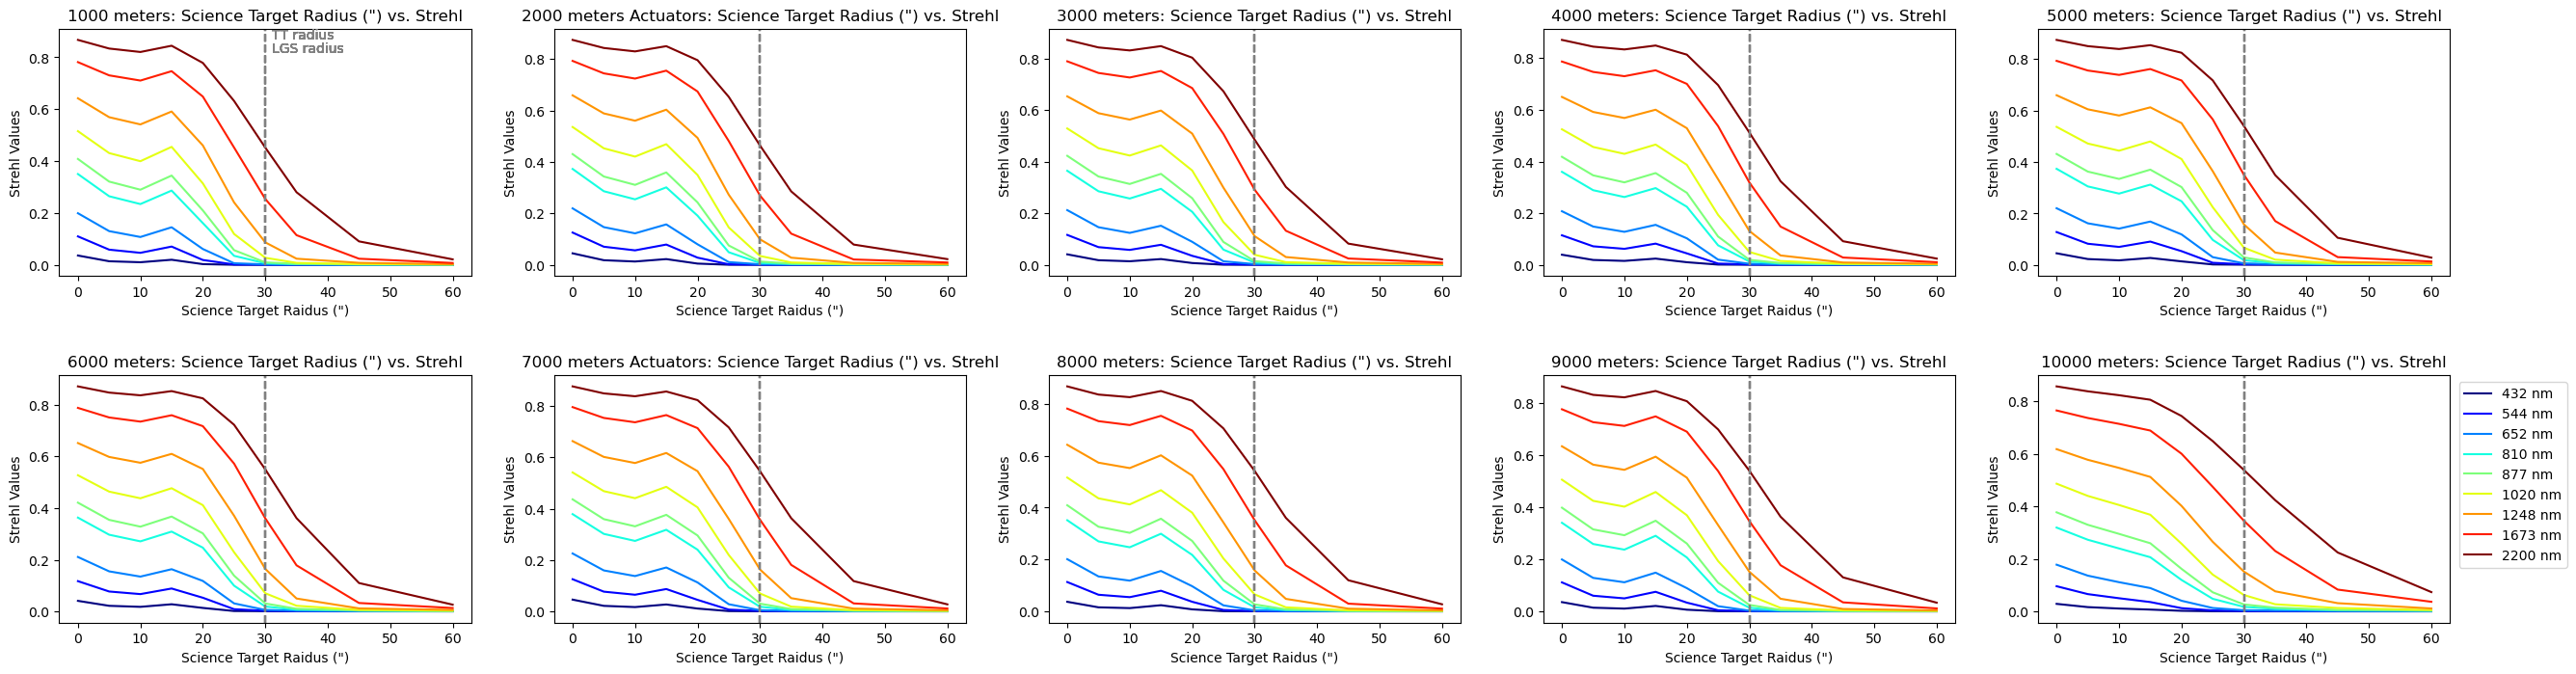

In [64]:
fig, ax = plt.subplots(2, 5, figsize=(32, 8))

# Iterate over each wavelength
for ww in range(n_wvl_2000):
    
    # Define label for the current wavelength
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #1000 meters
    ax[0,0].plot(x_1000[:, ww], strehl_1000[:, ww], color=colors_2000[ww])
    ax[0,0].set_title('1000 meters: Science Target Radius (") vs. Strehl')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].set_ylabel('Strehl Values')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(31, 0.82, 'LGS radius', color='grey', ha='left')
    ax[0,0].text(31, 0.87, 'TT radius', color='grey', ha='left')

    #2000 meters
    ax[0,1].plot(x_2000[:, ww], strehl_2000[:, ww], color=colors_2000[ww], label=label)
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].set_ylabel('Strehl Values')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].set_title('2000 meters Actuators: Science Target Radius (") vs. Strehl')

    #3000 meters
    ax[0,2].plot(x_3000[:, ww], strehl_3000[:, ww], color=colors_2000[ww], label=label)
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].set_ylabel('Strehl Values')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('3000 meters: Science Target Radius (") vs. Strehl')

    #4000 meters
    ax[0,3].plot(x_4000[:, ww], strehl_4000[:, ww], color=colors_2000[ww], label=label)
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].set_ylabel('Strehl Values')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('4000 meters: Science Target Radius (") vs. Strehl')

    #5000 meters
    ax[0,4].plot(x_5000[:, ww], strehl_5000[:, ww], color=colors_2000[ww], label=label)
    ax[0,4].set_xlabel('Science Target Raidus (")')
    ax[0,4].set_ylabel('Strehl Values')
    ax[0,4].axvline(30, linestyle='--', color='grey')
    ax[0,4].set_title('5000 meters: Science Target Radius (") vs. Strehl')

    #6000 meters
    ax[1,0].plot(x_6000[:, ww], strehl_6000[:, ww], color=colors_2000[ww], label=label)
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].set_ylabel('Strehl Values')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].set_title('6000 meters: Science Target Radius (") vs. Strehl')

    #7000 meters
    ax[1,1].plot(x_7000[:, ww], strehl_7000[:, ww], color=colors_2000[ww], label=label)
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].set_ylabel('Strehl Values')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].set_title('7000 meters Actuators: Science Target Radius (") vs. Strehl')

    #8000 meters
    ax[1,2].plot(x_8000[:, ww], strehl_8000[:, ww], color=colors_2000[ww], label=label)
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].set_ylabel('Strehl Values')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('8000 meters: Science Target Radius (") vs. Strehl')

    #9000 meters
    ax[1,3].plot(x_9000[:, ww], strehl_9000[:, ww], color=colors_2000[ww], label=label)
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].set_ylabel('Strehl Values')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('9000 meters: Science Target Radius (") vs. Strehl')

    #10000 meters
    ax[1,4].plot(x_10000[:, ww], strehl_10000[:, ww], color=colors_2000[ww], label=label)
    ax[1,4].set_xlabel('Science Target Raidus (")')
    ax[1,4].set_ylabel('Strehl Values')
    ax[1,4].axvline(30, linestyle='--', color='grey')
    ax[1,4].set_title('10000 meters: Science Target Radius (") vs. Strehl')
    ax[1,4].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

# Save the figure
#plt.savefig('actuator_study_plots/actuator_strehl_total.png', bbox_inches='tight', transparent=True)

### Radius vs. FWHM (Individual plots)

In [66]:
# Plotting Radius vs. FWHM for each dm height count
for i in height: 
    plt.figure(figsize=(4,4))
    
    for ww in range(n_wvl_2000):
        label = f'{w_2000[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        fwhm_data = locals()[f'fwhm_g_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        plt.plot(x_data, fwhm_data, color=color_data, label=label)
        
    plt.title(f'{i} Height: Science Target Radius (") vs. FWHM')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Gaussian Full-Width Half Max')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 240, 'LGS radius', color='grey', ha='right')
    plt.text(29, 260, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_fwhm_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()  

### Radius vs. FWHM (1 Subplot)

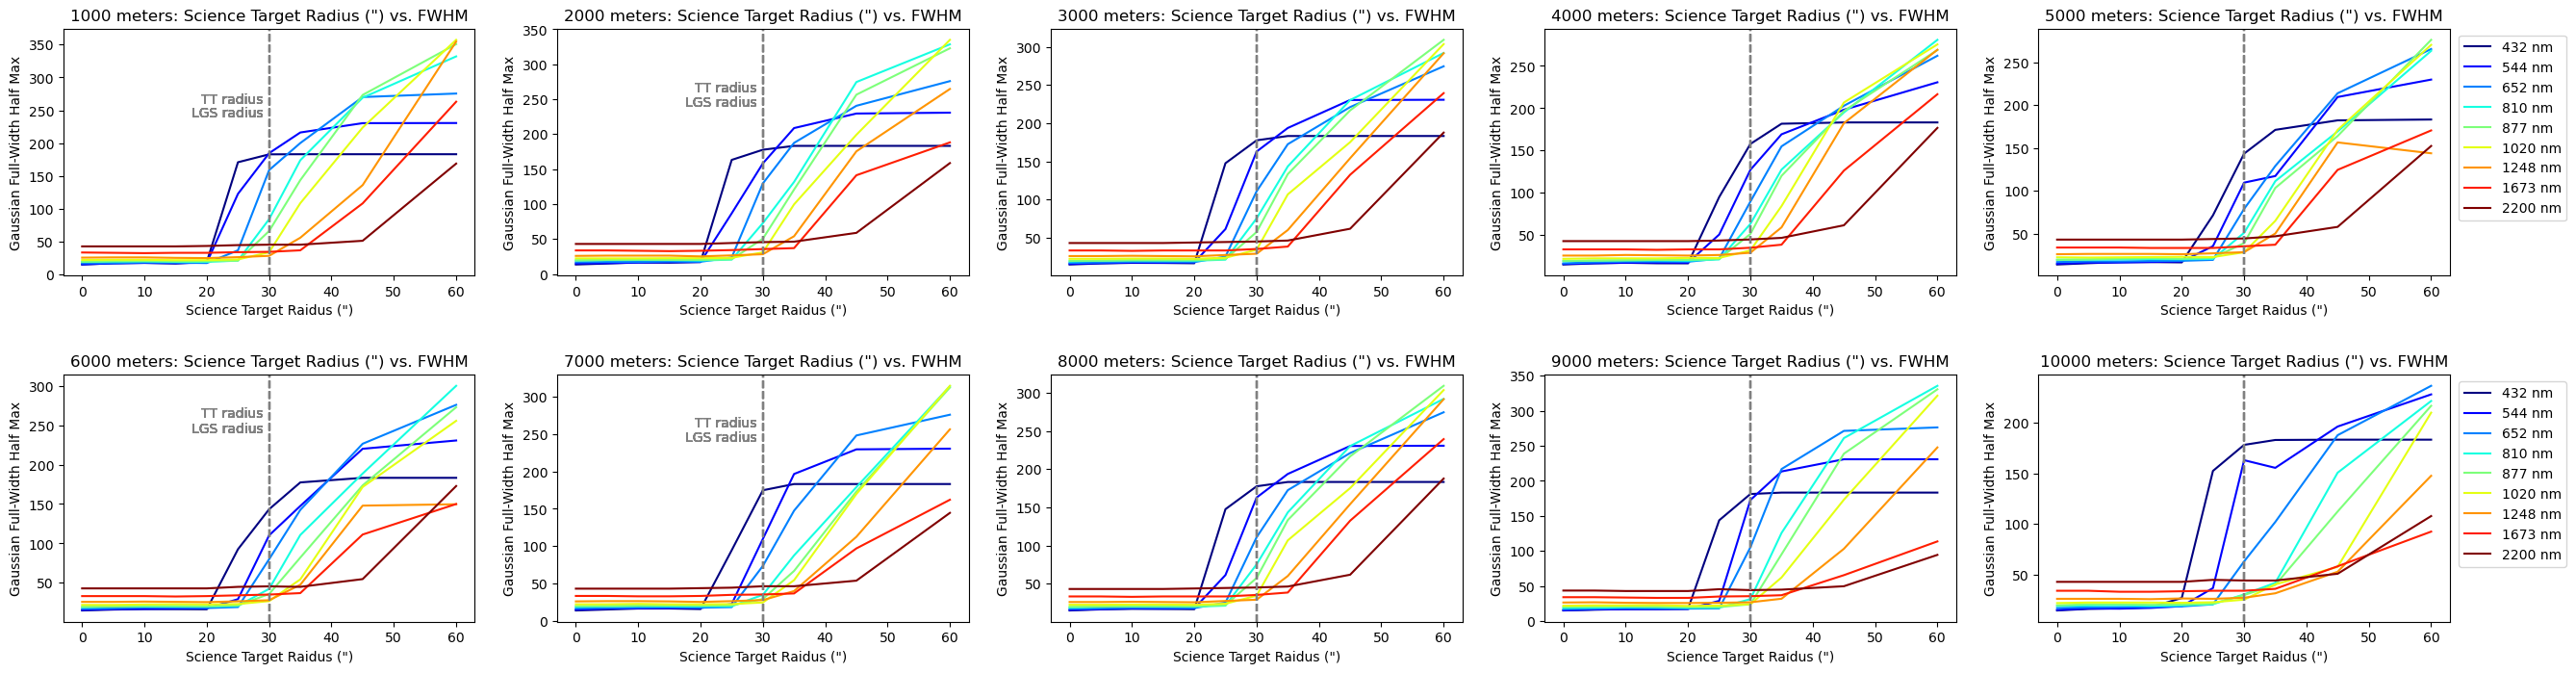

In [67]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 5, figsize=(32, 8))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #1000 meters
    ax[0,0].plot(x_1000[:, ww], fwhm_g_1000[:, ww], color=colors_2000[ww])
    ax[0,0].set_title('1000 meters: Science Target Radius (") vs. FWHM')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 260, 'TT radius', color='grey', ha='right')

    #2000 meters
    ax[0,1].plot(x_2000[:, ww], fwhm_g_2000[:, ww], color=colors_2000[ww])
    ax[0,1].set_title('2000 meters: Science Target Radius (") vs. FWHM')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 260, 'TT radius', color='grey', ha='right')

    #3000 meters
    ax[0,2].plot(x_3000[:, ww], fwhm_g_3000[:, ww], color=colors_2000[ww], label=label)
    ax[0,2].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('3000 meters: Science Target Radius (") vs. FWHM')

    #4000 meters
    ax[0,3].plot(x_4000[:, ww], fwhm_g_4000[:, ww], color=colors_2000[ww], label=label)
    ax[0,3].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('4000 meters: Science Target Radius (") vs. FWHM')

    #5000 meters
    ax[0,4].plot(x_5000[:, ww], fwhm_g_5000[:, ww], color=colors_2000[ww], label=label)
    ax[0,4].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,4].set_xlabel('Science Target Raidus (")')
    ax[0,4].axvline(30, linestyle='--', color='grey')
    ax[0,4].set_title('5000 meters: Science Target Radius (") vs. FWHM')
    ax[0,4].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    #6000 meters
    ax[1,0].plot(x_6000[:, ww], fwhm_g_6000[:, ww], color=colors_2000[ww])
    ax[1,0].set_title('6000 meters: Science Target Radius (") vs. FWHM')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 260, 'TT radius', color='grey', ha='right')

    #7000 meters
    ax[1,1].plot(x_7000[:, ww], fwhm_g_7000[:, ww], color=colors_2000[ww])
    ax[1,1].set_title('7000 meters: Science Target Radius (") vs. FWHM')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 260, 'TT radius', color='grey', ha='right')

    #8000 meters
    ax[1,2].plot(x_8000[:, ww], fwhm_g_3000[:, ww], color=colors_2000[ww], label=label)
    ax[1,2].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('8000 meters: Science Target Radius (") vs. FWHM')

    #9000 meters
    ax[1,3].plot(x_9000[:, ww], fwhm_g_9000[:, ww], color=colors_2000[ww], label=label)
    ax[1,3].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('9000 meters: Science Target Radius (") vs. FWHM')

    #10000 meters
    ax[1,4].plot(x_10000[:, ww], fwhm_g_10000[:, ww], color=colors_2000[ww], label=label)
    ax[1,4].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,4].set_xlabel('Science Target Raidus (")')
    ax[1,4].axvline(30, linestyle='--', color='grey')
    ax[1,4].set_title('10000 meters: Science Target Radius (") vs. FWHM')
    ax[1,4].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 
    
#plt.savefig('actuator_study_plots/actuator_fwhm_total.png', bbox_inches='tight', transparent=True)

### Radius vs. EE50 (Individual plots)

In [68]:
for i in height: 
    plt.figure(figsize=(8,8))
    
    for ww in range(n_wvl_2000):
        label = f'{w_2000[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        r_ee50_data = locals()[f'r_ee50_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        plt.plot(x_data, r_ee50_data, color=color_data, label=label)
        
    plt.title(f'{i} Height: Science Target Radius (") vs. EE50')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('50% Encircled Energy')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 175, 'LGS radius', color='grey', ha='right')
    plt.text(29, 195, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_ee50_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. EE50 (1 Subplot)

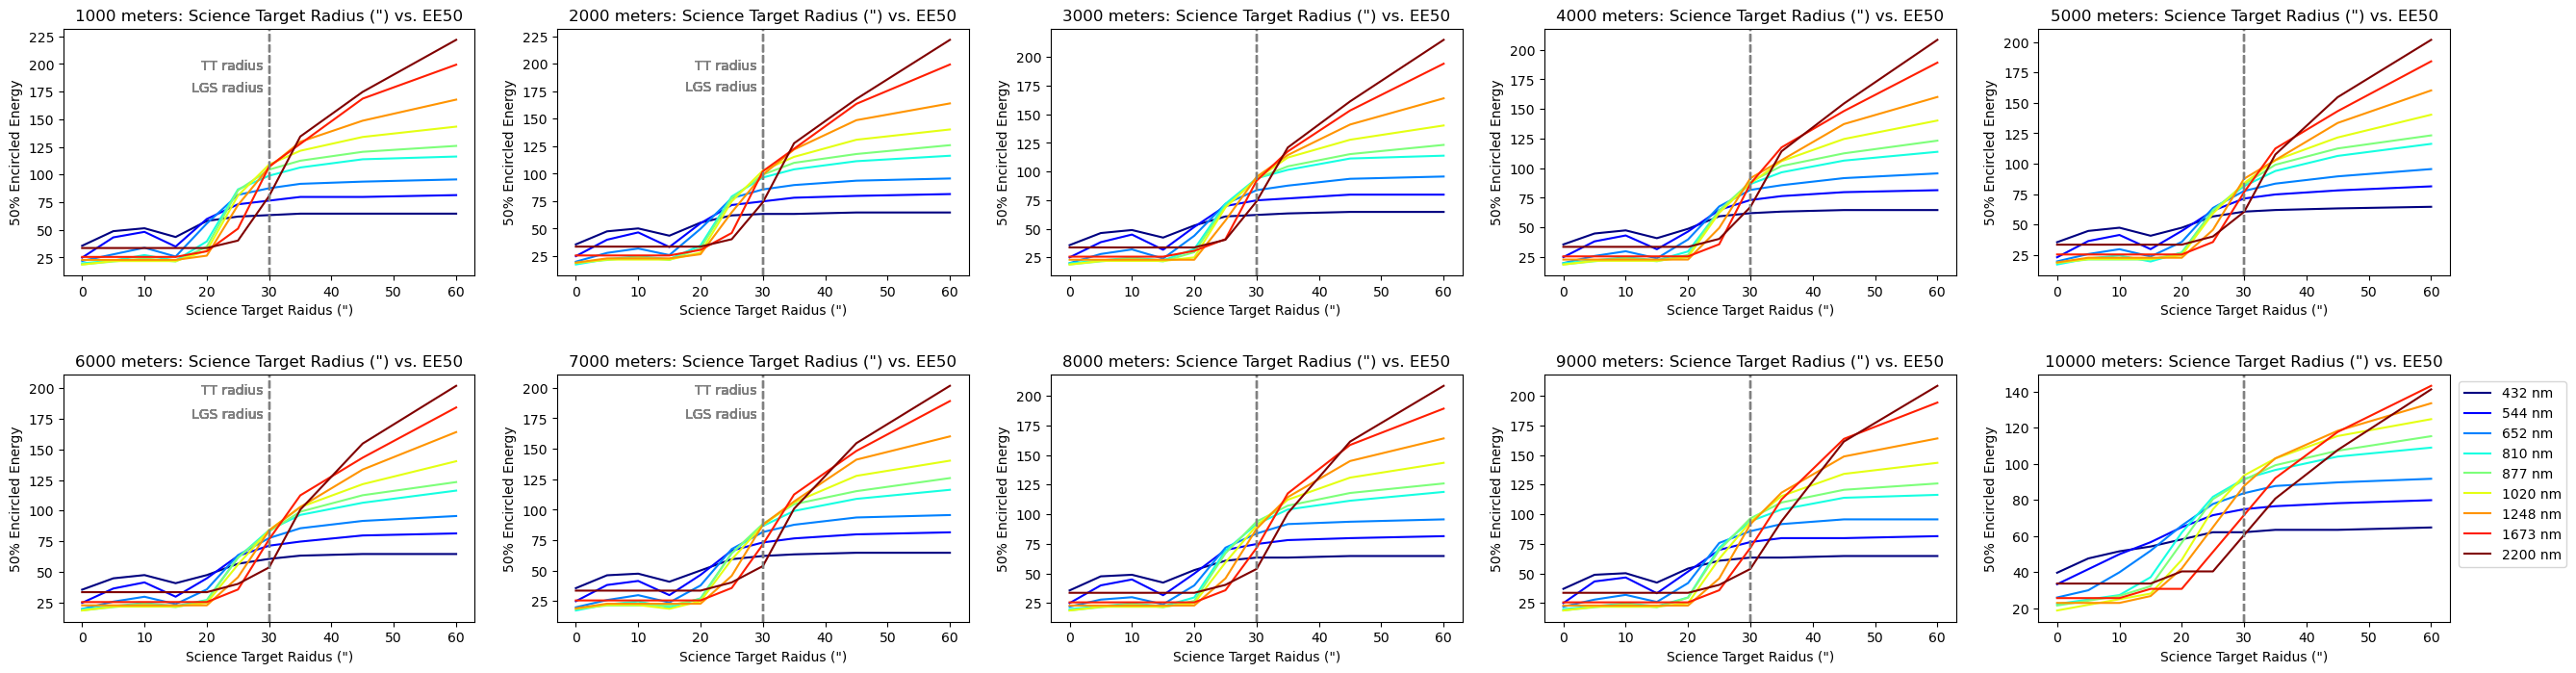

In [70]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 5, figsize=(32, 8))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #1000 meters
    ax[0,0].plot(x_1000[:, ww], r_ee50_1000[:, ww], color=colors_2000[ww])
    ax[0,0].set_title('1000 meters: Science Target Radius (") vs. EE50')
    ax[0,0].set_ylabel('50% Encircled Energy')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 195, 'TT radius', color='grey', ha='right')

    #2000 meters
    ax[0,1].plot(x_2000[:, ww], r_ee50_2000[:, ww], color=colors_2000[ww])
    ax[0,1].set_title('2000 meters: Science Target Radius (") vs. EE50')
    ax[0,1].set_ylabel('50% Encircled Energy')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 195, 'TT radius', color='grey', ha='right')

    #3000 meters
    ax[0,2].plot(x_3000[:, ww], r_ee50_3000[:, ww], color=colors_2000[ww], label=label)
    ax[0,2].set_ylabel('50% Encircled Energy')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('3000 meters: Science Target Radius (") vs. EE50')

    #4000 meters
    ax[0,3].plot(x_4000[:, ww], r_ee50_4000[:, ww], color=colors_2000[ww], label=label)
    ax[0,3].set_ylabel('50% Encircled Energy')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('4000 meters: Science Target Radius (") vs. EE50')

    #5000 meters
    ax[0,4].plot(x_5000[:, ww], r_ee50_5000[:, ww], color=colors_2000[ww], label=label)
    ax[0,4].set_ylabel('50% Encircled Energy')
    ax[0,4].set_xlabel('Science Target Raidus (")')
    ax[0,4].axvline(30, linestyle='--', color='grey')
    ax[0,4].set_title('5000 meters: Science Target Radius (") vs. EE50')

    #6000 meters
    ax[1,0].plot(x_6000[:, ww], r_ee50_6000[:, ww], color=colors_2000[ww])
    ax[1,0].set_title('6000 meters: Science Target Radius (") vs. EE50')
    ax[1,0].set_ylabel('50% Encircled Energy')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 195, 'TT radius', color='grey', ha='right')

    #7000 meters
    ax[1,1].plot(x_7000[:, ww], r_ee50_7000[:, ww], color=colors_2000[ww])
    ax[1,1].set_title('7000 meters: Science Target Radius (") vs. EE50')
    ax[1,1].set_ylabel('50% Encircled Energy')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 195, 'TT radius', color='grey', ha='right')

    #8000 meters
    ax[1,2].plot(x_8000[:, ww], r_ee50_8000[:, ww], color=colors_2000[ww], label=label)
    ax[1,2].set_ylabel('50% Encircled Energy')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('8000 meters: Science Target Radius (") vs. EE50')

    #9000 meters
    ax[1,3].plot(x_9000[:, ww], r_ee50_9000[:, ww], color=colors_2000[ww], label=label)
    ax[1,3].set_ylabel('50% Encircled Energy')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('9000 meters: Science Target Radius (") vs. EE50')

    #5000 meters
    ax[1,4].plot(x_10000[:, ww], r_ee50_10000[:, ww], color=colors_2000[ww], label=label)
    ax[1,4].set_ylabel('50% Encircled Energy')
    ax[1,4].set_xlabel('Science Target Raidus (")')
    ax[1,4].axvline(30, linestyle='--', color='grey')
    ax[1,4].set_title('10000 meters: Science Target Radius (") vs. EE50')
    ax[1,4].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

#plt.savefig('actuator_study_plots/actuator_ee50_total.png', bbox_inches='tight', transparent=True)

### Radius vs. EE80 (Individual plots)

In [71]:
for i in height: 
    plt.figure(figsize=(8,8))
    
    for ww in range(n_wvl_2000):
        label = f'{w_2000[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        r_ee80_data = locals()[f'r_ee80_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        plt.plot(x_data, r_ee80_data, color=color_data, label=label)
        
    plt.title(f'{i} Actuators: Science Target Radius (") vs. EE80')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('80% Encircled Energy')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 290, 'LGS radius', color='grey', ha='right')
    plt.text(29, 310, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_ee80_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. EE80 (1 Subplot)

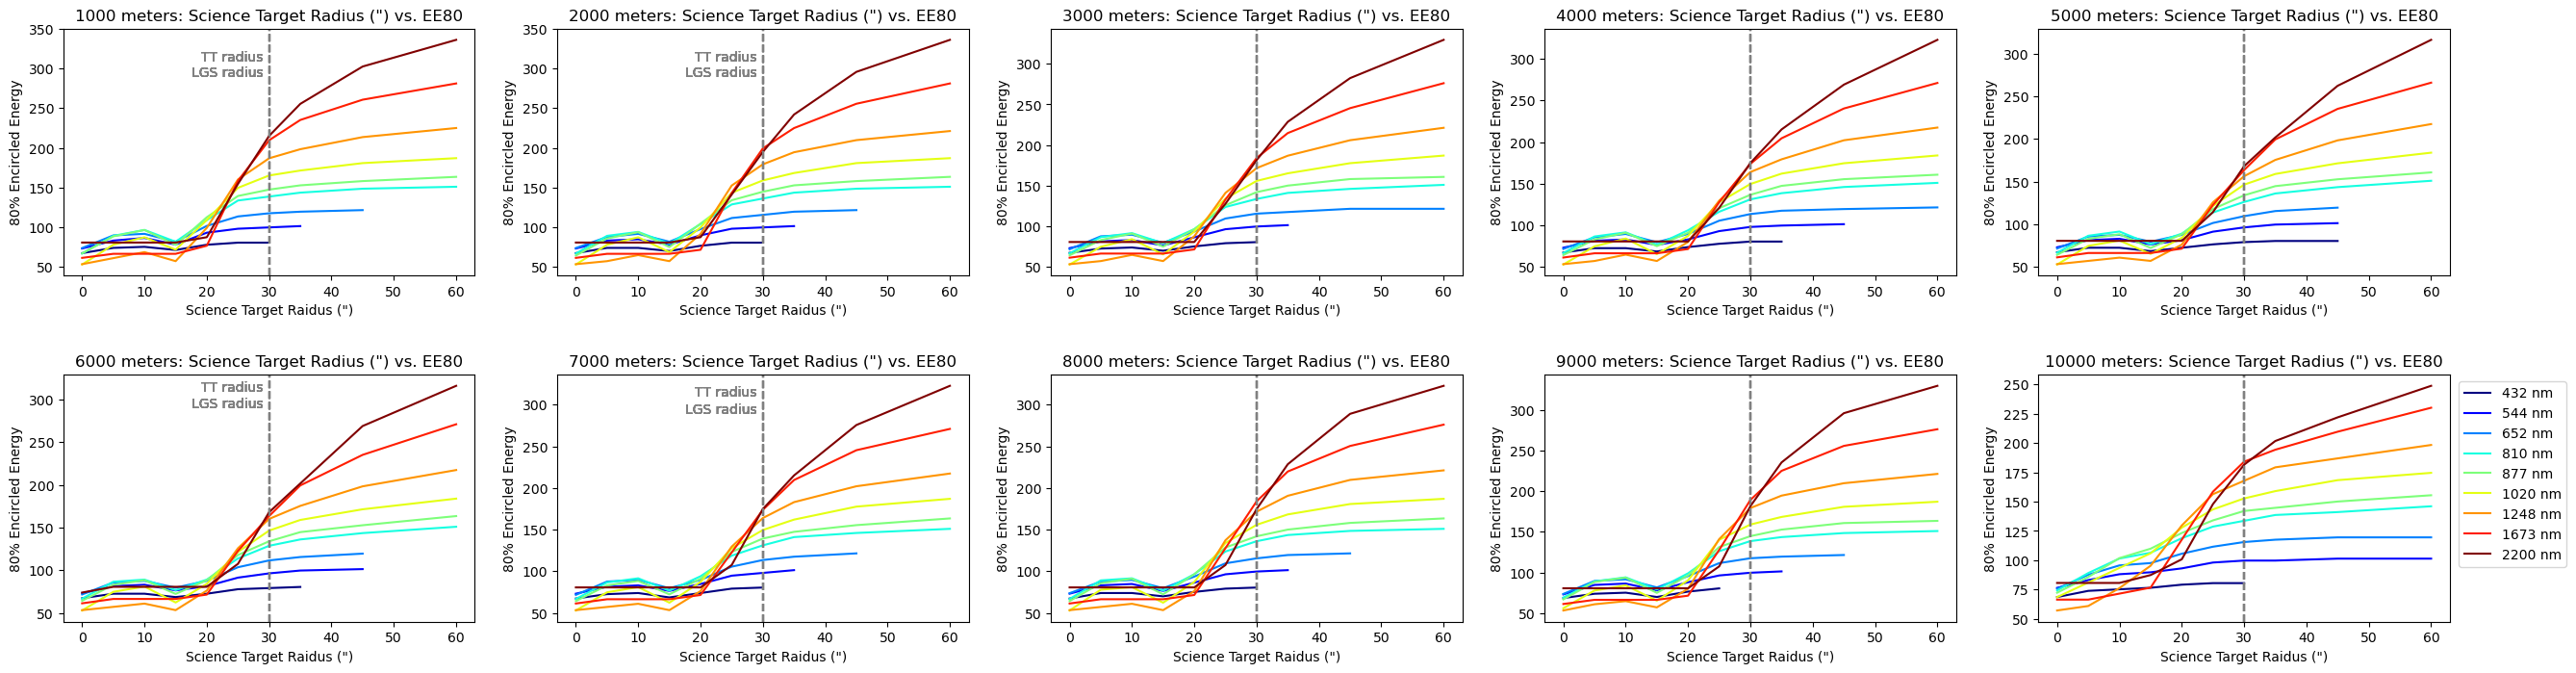

In [74]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 5, figsize=(32, 8))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #1000 meters
    ax[0,0].plot(x_1000[:, ww], r_ee80_1000[:, ww], color=colors_2000[ww])
    ax[0,0].set_title('1000 meters: Science Target Radius (") vs. EE80')
    ax[0,0].set_ylabel('80% Encircled Energy')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 310, 'TT radius', color='grey', ha='right')

    #2000 meters
    ax[0,1].plot(x_1000[:, ww], r_ee80_2000[:, ww], color=colors_2000[ww])
    ax[0,1].set_title('2000 meters: Science Target Radius (") vs. EE80')
    ax[0,1].set_ylabel('80% Encircled Energy')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 310, 'TT radius', color='grey', ha='right')

    #3000 meters
    ax[0,2].plot(x_3000[:, ww], r_ee80_3000[:, ww], color=colors_2000[ww], label=label)
    ax[0,2].set_ylabel('80% Encircled Energy')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('3000 meters: Science Target Radius (") vs. EE80')

    #4000 meters
    ax[0,3].plot(x_4000[:, ww], r_ee80_4000[:, ww], color=colors_2000[ww], label=label)
    ax[0,3].set_ylabel('80% Encircled Energy')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('4000 meters: Science Target Radius (") vs. EE80')

    #5000 meters
    ax[0,4].plot(x_5000[:, ww], r_ee80_5000[:, ww], color=colors_2000[ww], label=label)
    ax[0,4].set_ylabel('80% Encircled Energy')
    ax[0,4].set_xlabel('Science Target Raidus (")')
    ax[0,4].axvline(30, linestyle='--', color='grey')
    ax[0,4].set_title('5000 meters: Science Target Radius (") vs. EE80')

    #6000 meters
    ax[1,0].plot(x_6000[:, ww], r_ee80_6000[:, ww], color=colors_2000[ww])
    ax[1,0].set_title('6000 meters: Science Target Radius (") vs. EE80')
    ax[1,0].set_ylabel('80% Encircled Energy')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 310, 'TT radius', color='grey', ha='right')

    #7000 meters
    ax[1,1].plot(x_7000[:, ww], r_ee80_7000[:, ww], color=colors_2000[ww])
    ax[1,1].set_title('7000 meters: Science Target Radius (") vs. EE80')
    ax[1,1].set_ylabel('80% Encircled Energy')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 310, 'TT radius', color='grey', ha='right')

    #8000 meters
    ax[1,2].plot(x_8000[:, ww], r_ee80_8000[:, ww], color=colors_2000[ww], label=label)
    ax[1,2].set_ylabel('80% Encircled Energy')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('8000 meters: Science Target Radius (") vs. EE80')

    #9000 meters
    ax[1,3].plot(x_9000[:, ww], r_ee80_9000[:, ww], color=colors_2000[ww], label=label)
    ax[1,3].set_ylabel('80% Encircled Energy')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('9000 meters: Science Target Radius (") vs. EE80')

    #10000 meters
    ax[1,4].plot(x_10000[:, ww], r_ee80_10000[:, ww], color=colors_2000[ww], label=label)
    ax[1,4].set_ylabel('80% Encircled Energy')
    ax[1,4].set_xlabel('Science Target Raidus (")')
    ax[1,4].axvline(30, linestyle='--', color='grey')
    ax[1,4].set_title('10000 meters: Science Target Radius (") vs. EE80')
    ax[1,4].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

#plt.savefig('actuator_study_plots/actuator_ee80_total.png', bbox_inches='tight', transparent=True)

### Radius vs. WFE (Individual plots)

In [89]:
# Define colors for wavefront error 
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors_wfe = ["r", "g", "b"]

for i in height: 
    plt.figure(figsize=(8,8))
    
    for j, color in enumerate(colors_wfe):
        clos_data = locals()[f'clos_xx_mean_nm_{i}'][:, j]
        plt.plot(x_data, clos_data, color=colors_wfe[j], label=wfe[j])
        
    plt.title(f'{i} Height: Science Target Radius (") vs. EE80')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Wave-front Error (nm)')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 750, 'LGS radius', color='grey', ha='right')
    plt.text(29, 800, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_wfe_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. WFE (1 Subplot)

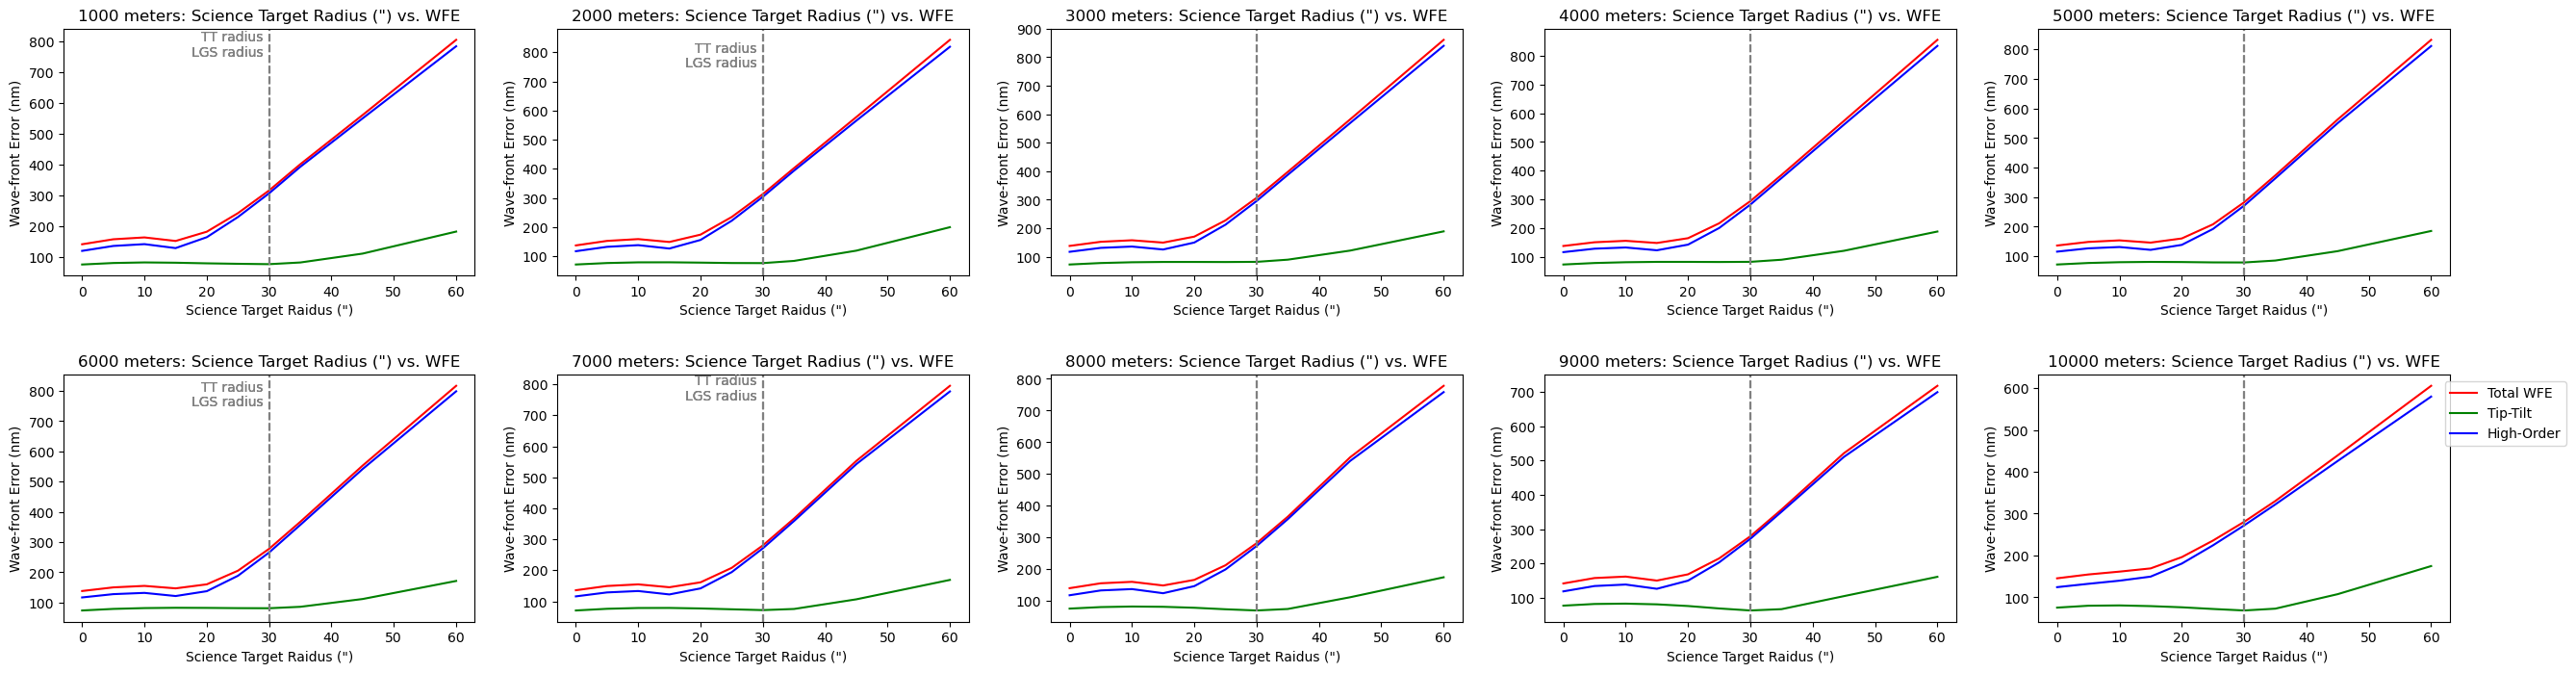

In [92]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 5, figsize=(32, 8))

for i,c in enumerate(colors_wfe):

    #1000 meters
    ax[0,0].plot(psf_x, clos_xx_mean_nm_1000[:,i], color=colors_wfe[i])
    ax[0,0].set_title('1000 meters: Science Target Radius (") vs. WFE')
    ax[0,0].set_ylabel('Wave-front Error (nm)')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 800, 'TT radius', color='grey', ha='right')
    
    #2000 meters
    ax[0,1].plot(psf_x, clos_xx_mean_nm_2000[:,i], color=colors_wfe[i])
    ax[0,1].set_title('2000 meters: Science Target Radius (") vs. WFE')
    ax[0,1].set_ylabel('Wave-front Error (nm)')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 800, 'TT radius', color='grey', ha='right')

    #3000 meters
    ax[0,2].plot(psf_x, clos_xx_mean_nm_3000[:,i], color=colors_wfe[i])
    ax[0,2].set_title('3000 meters: Science Target Radius (") vs. WFE')
    ax[0,2].set_ylabel('Wave-front Error (nm)')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')

    #4000 meters
    ax[0,3].plot(psf_x, clos_xx_mean_nm_4000[:,i], color=colors_wfe[i])
    ax[0,3].set_title('4000 meters: Science Target Radius (") vs. WFE')
    ax[0,3].set_ylabel('Wave-front Error (nm)')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')

    #5000 meters
    ax[0,4].plot(psf_x, clos_xx_mean_nm_5000[:,i], color=colors_wfe[i], label=wfe[i])
    ax[0,4].set_title('5000 meters: Science Target Radius (") vs. WFE')
    ax[0,4].set_ylabel('Wave-front Error (nm)')
    ax[0,4].set_xlabel('Science Target Raidus (")')
    ax[0,4].axvline(30, linestyle='--', color='grey')

    #6000 meters
    ax[1,0].plot(psf_x, clos_xx_mean_nm_6000[:,i], color=colors_wfe[i])
    ax[1,0].set_title('6000 meters: Science Target Radius (") vs. WFE')
    ax[1,0].set_ylabel('Wave-front Error (nm)')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 800, 'TT radius', color='grey', ha='right')

    #7000 meters
    ax[1,1].plot(psf_x, clos_xx_mean_nm_7000[:,i], color=colors_wfe[i])
    ax[1,1].set_title('7000 meters: Science Target Radius (") vs. WFE')
    ax[1,1].set_ylabel('Wave-front Error (nm)')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 800, 'TT radius', color='grey', ha='right')

    #8000 meters
    ax[1,2].plot(psf_x, clos_xx_mean_nm_8000[:,i], color=colors_wfe[i])
    ax[1,2].set_title('8000 meters: Science Target Radius (") vs. WFE')
    ax[1,2].set_ylabel('Wave-front Error (nm)')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')

    #9000 meters
    ax[1,3].plot(psf_x, clos_xx_mean_nm_9000[:,i], color=colors_wfe[i])
    ax[1,3].set_title('9000 meters: Science Target Radius (") vs. WFE')
    ax[1,3].set_ylabel('Wave-front Error (nm)')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')

    #10000 meters
    ax[1,4].plot(psf_x, clos_xx_mean_nm_10000[:,i], color=colors_wfe[i], label=wfe[i])
    ax[1,4].set_title('10000 meters: Science Target Radius (") vs. WFE')
    ax[1,4].set_ylabel('Wave-front Error (nm)')
    ax[1,4].set_xlabel('Science Target Raidus (")')
    ax[1,4].axvline(30, linestyle='--', color='grey')
    ax[1,4].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

#plt.savefig('actuator_study_plots/actuator_wfe_total.png', bbox_inches='tight', transparent=True)

### Actuator vs. PSF Metrics (1000 nm) and WFE (center)

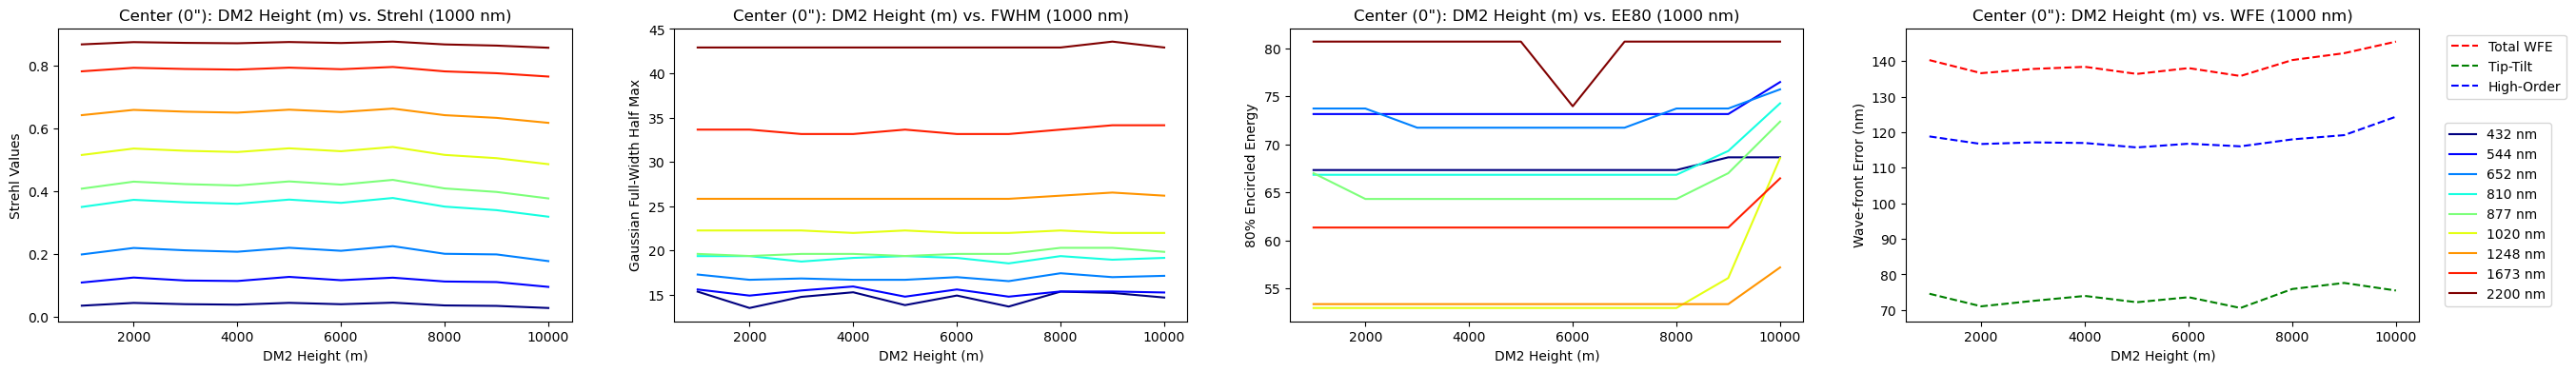

In [94]:
#Create separate lists

metrics = ["strehls", "fwhm", "ee80"]
metric_labels = ["Strehl Values", "Gaussian Full-Width Half Max", "80% Encircled Energy"] 

height_strehls = []
height_fwhm = []
height_ee80 = []
height_wfe = []

height = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
wfe_colors = ["r", "g", "b"]
wfe_labels = ["Total WFE", "Tip-Tilt", "High-Order"]

for strehl1000, strehl2000, strehl3000, strehl4000, strehl5000, strehl6000, strehl7000, strehl8000, strehl9000, strehl10000 in zip(strehl_1000[0], strehl_2000[0], strehl_3000[0], strehl_4000[0], strehl_5000[0], strehl_6000[0], strehl_7000[0], strehl_8000[0], strehl_9000[0], strehl_10000[0]):
    height_strehls.append([strehl1000, strehl2000, strehl3000, strehl4000, strehl5000, strehl6000, strehl7000, strehl8000, strehl9000, strehl10000])

for fwhm1000, fwhm2000, fwhm3000, fwhm4000, fwhm5000, fwhm6000, fwhm7000, fwhm8000, fwhm9000, fwhm10000 in zip(fwhm_g_1000[0], fwhm_g_2000[0], fwhm_g_3000[0], fwhm_g_4000[0], fwhm_g_5000[0], fwhm_g_6000[0], fwhm_g_7000[0], fwhm_g_8000[0], fwhm_g_9000[0], fwhm_g_10000[0]):
    height_fwhm.append([fwhm1000, fwhm2000, fwhm3000, fwhm4000, fwhm5000, fwhm6000, fwhm7000, fwhm8000, fwhm9000, fwhm10000])

for ee801000, ee802000, ee803000, ee804000, ee805000, ee806000, ee807000, ee808000, ee809000, ee8010000 in zip(r_ee80_1000[0], r_ee80_2000[0], r_ee80_3000[0], r_ee80_4000[0], r_ee80_5000[0], r_ee80_6000[0], r_ee80_7000[0], r_ee80_8000[0], r_ee80_9000[0], r_ee80_10000[0]):
    height_ee80.append([ee801000, ee802000, ee803000, ee804000, ee805000, ee806000, ee807000, ee808000, ee809000, ee8010000])

for wfe1000, wfe2000, wfe3000, wfe4000, wfe5000, wfe6000, wfe7000, wfe8000, wfe9000, wfe10000 in zip(clos_xx_mean_nm_1000[0], clos_xx_mean_nm_2000[0], clos_xx_mean_nm_3000[0], clos_xx_mean_nm_4000[0], clos_xx_mean_nm_5000[0], clos_xx_mean_nm_6000[0], clos_xx_mean_nm_7000[0], clos_xx_mean_nm_8000[0], clos_xx_mean_nm_9000[0], clos_xx_mean_nm_10000[0]):
    height_wfe.append([wfe1000, wfe2000, wfe3000, wfe4000, wfe5000, wfe6000, wfe7000, wfe8000, wfe9000, wfe10000])

n_wvls = len(height_strehls)
colors = plt.cm.jet(np.linspace(0, 1, n_wvls))

n_wfe = len(height_wfe)

for i, metric in enumerate(metrics): 
    plt.figure(figsize=(8,8))
    
    for j in range(n_wvls):
        labels_psf = f'{w_2000[0, j]*1e3:3.0f} nm'
        metric_data = locals()[f'height_{metric}'][j]
        plt.plot(height, metric_data, color=colors[j], label=labels_psf)
        
    plt.title(f'Center (0"): DM2 Height (m) vs. {metric_labels[i]} (1000 nm)')
    plt.xlabel('DM2 Height (m)')
    plt.ylabel(f'{metric_labels[i]}')
    plt.legend()

    #plt.savefig(f'actuator_study_plots/actuator_{metric}_center_1000nm.png', bbox_inches='tight', transparent=True)
    plt.close()

plt.figure(figsize=(8,8))
for i in range(n_wfe):
    labels_wfe = f'{wfe_labels[i]}' 
    plt.plot(height, height_wfe[i], label=wfe_labels[i], color=wfe_colors[i], linestyle='dashed')
    
plt.title('Center (0"): DM2 Height (m) vs. WFE (1000 nm)')
plt.xlabel('DM2 Height (m)')
plt.ylabel('Wave-front Error (nm)') 
plt.legend()
#plt.savefig(f'actuator_study_plots/actuator_wfe_center_1000nm.png', bbox_inches='tight', transparent=True)
plt.close()

#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for col_idx in range(n_wvls):
    labels_psf = f'{w_2000[0, col_idx]*1e3:3.0f} nm'
    
    ax[0].plot(height, height_strehls[col_idx], label=labels_psf, color=colors[col_idx])
    ax[0].set_title('Center (0"): DM2 Height (m) vs. Strehl (1000 nm)')
    ax[0].set_xlabel('DM2 Height (m)')
    ax[0].set_ylabel('Strehl Values')
    
    ax[1].plot(height, height_fwhm[col_idx], label=labels_psf, color=colors[col_idx])
    ax[1].set_title('Center (0"): DM2 Height (m) vs. FWHM (1000 nm)')
    ax[1].set_xlabel('DM2 Height (m)')
    ax[1].set_ylabel('Gaussian Full-Width Half Max')
    
    ax[2].plot(height, height_ee80[col_idx], label=labels_psf, color=colors[col_idx])
    ax[2].set_title('Center (0"): DM2 Height (m) vs. EE80 (1000 nm)')
    ax[2].set_xlabel('DM2 Height (m)')
    ax[2].set_ylabel('80% Encircled Energy')

for col_idx in range(n_wfe):
    labels_wfe = f'{wfe_labels[col_idx]}' 

    ax[3].plot(height, height_wfe[col_idx], label=wfe_labels[col_idx], color=wfe_colors[col_idx], linestyle='dashed')
    ax[3].set_title('Center (0"): DM2 Height (m) vs. WFE (1000 nm)')
    ax[3].set_xlabel('DM2 Height (m)')
    ax[3].set_ylabel('Wave-front Error (nm)')

ax[2].legend(loc='upper right', bbox_to_anchor=(2.47, .7))
ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.savefig('actuator_study_plots/actuator_psf_total_center_1000nm.png', bbox_inches='tight', transparent=True)